In [2]:
!pip install torchvision 


[notice] A new release of pip is available: 23.2.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1]:
import torchvision.models as models
from PIL import Image
import pandas
from torchvision import transforms
import torch.nn as nn
import time
import torch 
import matplotlib.pylab as plt
import numpy as np
from torch.utils.data import Dataset, DataLoader
import h5py
import os
import glob
torch.manual_seed(0)
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt
from PIL import Image
import pandas as pd
import os
from torch.utils.data import Dataset
import sklearn

In [4]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("masoudnickparvar/brain-tumor-mri-dataset")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\Nova\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1


In [9]:
import os
from PIL import Image
from torch.utils.data import Dataset
from torchvision import transforms

class BrainTumorDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.classes = sorted(os.listdir(root_dir))  
        self.image_paths = []
        self.labels = []


        print(f"Classes found: {self.classes}")

        
        for idx, class_name in enumerate(self.classes): 
            class_dir = os.path.join(root_dir, class_name)
            if os.path.isdir(class_dir): 
                print(f"Loading images from class: {class_name}, Label: {idx}")
                for image_name in os.listdir(class_dir):
                    image_path = os.path.join(class_dir, image_name)
                    if os.path.isfile(image_path):
                        self.image_paths.append(image_path)
                        self.labels.append(idx)

        
        print(f"Total images loaded: {len(self.image_paths)}")

    def __len__(self):
        return len(self.image_paths)

    def __getitem__(self, idx):
        img_path = self.image_paths[idx]
        label = self.labels[idx]
        image = Image.open(img_path).convert("RGB")

        if self.transform:
            image = self.transform(image)

        return image, label


In [10]:
transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),          
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize
])


In [11]:
train_dataset = BrainTumorDataset(root_dir="C:\\Users\\Nova\\.cache\\kagglehub\\datasets\\masoudnickparvar\\brain-tumor-mri-dataset\\versions\\1\\Training",transform=transform)
validation_dataset = BrainTumorDataset(
    root_dir=r"C:\Users\Nova\.cache\kagglehub\datasets\masoudnickparvar\brain-tumor-mri-dataset\versions\1\Testing",
    transform=transform
)

Classes found: ['glioma', 'meningioma', 'notumor', 'pituitary']
Loading images from class: glioma, Label: 0
Loading images from class: meningioma, Label: 1
Loading images from class: notumor, Label: 2
Loading images from class: pituitary, Label: 3
Total images loaded: 5712
Classes found: ['glioma', 'meningioma', 'notumor', 'pituitary']
Loading images from class: glioma, Label: 0
Loading images from class: meningioma, Label: 1
Loading images from class: notumor, Label: 2
Loading images from class: pituitary, Label: 3
Total images loaded: 1311


In [19]:
model = models.resnet18(pretrained = True)

for param in model.parameters():
    param.require_grad = False

C:\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [20]:
model.fc = nn.Linear(512,4)

In [19]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights = compute_class_weight(class_weight='balanced',classes=np.unique(train_dataset.labels),y=train_dataset.labels)
class_weights = torch.tensor(class_weights, dtype=torch.float).to(device)

In [43]:
#criterion = nn.CrossEntropyLoss()
critereon = nn.CrossEntropyLoss(weight=class_weights)

train_loader = DataLoader(train_dataset, batch_size=100, shuffle=True)
test_loader = DataLoader(validation_dataset, batch_size=100, shuffle=False)

optimizer = torch.optim.Adam([parameters  for parameters in model.parameters() if parameters.requires_grad],lr=0.001)

In [48]:
n_epochs=3
loss_list=[]
accuracy_list=[]
correct=0
N_test=len(validation_dataset)
N_train=len(train_dataset)
start_time = time.time()
#n_epochs
i = 1
Loss = 0
start_time = time.time()
for epoch in range(n_epochs):
    print("train")
    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    model.to(device)

    for x, y in train_loader:
        x, y = x.to(device), y.to(device)
        model.train() 
        #clear gradient 
        optimizer.zero_grad()
         
        if x.size(0) >= 100:
            x = x.view( 100, 3 , 224 , 224 )
        else:
            x = x.view( x.size(0) , 3 , 224 , 224 ) 
        z = model(x)
        print(i)
        i+=1
        # calculate loss 
        loss = critereon(z, y)
        # calculate gradients of parameters 
        loss.backward()
        # update parameters 
        optimizer.step()
        loss_list.append(loss.data)
        
    torch.save(model.state_dict(), 'model.pth')
    
   

train
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
train
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
train
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174


In [49]:
i = 1
accuracy_list=[]
correct=0
N_test=len(validation_dataset)
correct = 0
for x_test, y_test in test_loader:
    print(i)
    i += 1
    # Move data to the same device as the model
    x_test, y_test = x_test.to(device), y_test.to(device)

    # Set model to eval mode
    model.eval()

    # Make a prediction
    z = model(x_test)

    # Find the predicted class (the index with the highest score)
    _, yhat = torch.max(z, 1)

    # Calculate the number of correct predictions
    correct += (yhat == y_test).sum().item()


1
2
3
4
5
6
7
8
9
10
11
12
13
14


In [50]:
accuracy = correct / N_test
print(accuracy)

0.9717772692601068


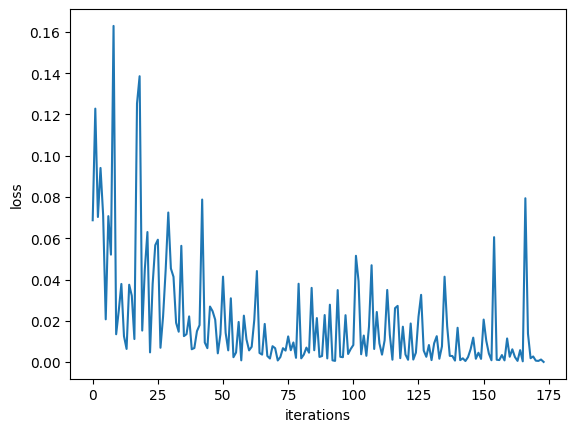

In [51]:
plt.plot(loss_list)
plt.xlabel("iterations")
plt.ylabel("loss")
plt.show()

In [52]:

# Define the same model architecture
model = models.resnet18(pretrained=True)
model.fc = nn.Linear(512, 4)  # Match the number of output classes
model.load_state_dict(torch.load('model.pth'))
model.eval()


C:\Python312\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Python312\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
C:\Users\Nova\AppData\Local\Temp\ipykernel_27684\525202233.py:4: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [53]:
model.load_state_dict(torch.load('model.pth'))
model.eval() 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model.to(device)


C:\Users\Nova\AppData\Local\Temp\ipykernel_27684\3666053541.py:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('model.pth'))


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

In [54]:
import gradio as gr

transform = transforms.Compose([
    transforms.Resize((224, 224)),  
    transforms.ToTensor(),          
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  
])


class_names = ['glioma', 'meningioma', 'notumor', 'pituitary']

def predict(image_path):
    # Open image and preprocess it
    image = Image.open(image_path).convert("RGB")
    input_tensor = transform(image).unsqueeze(0).to(device)
    with torch.no_grad():
        output = model(input_tensor)
        _, predicted_class = torch.max(output, 1)
    return class_names[predicted_class.item()]


interface = gr.Interface(
    fn=predict, 
    inputs=gr.Image(type="filepath"), 
    outputs="text", 
    title="Brain Tumor Detection",
    description="Upload an MRI image to predict the type of brain tumor.",
)

# Launch the app in the notebook
interface.launch(share=True)

* Running on local URL:  http://127.0.0.1:7860

Could not create share link. Please check your internet connection or our status page: https://status.gradio.app.
